In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from functools import reduce

%matplotlib inline

## Loading data

In [2]:
#set to see all columns of data
pd.set_option('display.max_columns', 999)

In [3]:
#load all 3 csv file
data = pd.read_csv('AdvWorksCusts.csv')
buy = pd.read_csv('AW_BikeBuyer.csv')
spend = pd.read_csv('AW_AveMonthSpend.csv')

In [4]:
#explore 3 files and shape 
# buy.head()
# buy.shape
# spend.head()
spend.shape
# data.head()
# data.shape

(16519, 2)

In [5]:
#Merge 3 dataframe with reduce from functools
dt = reduce(lambda x,y: pd.merge(x,y, on='CustomerID'), [data, buy, spend])

## Clean data

#### Steps:

- Explore some rows, shape, columns name
- Format inconsistency-  format columns names(as needed)
- Treat missing values(detect, treat= DROP/FILL IN)
- Treat duplicate values
- Treat string value: convert obj to numeric(as needed)
- Treat errors and outliers after described

In [6]:
dt.head(10)

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,AveMonthSpend
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,0,89
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141,1,117
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945,0,123
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688,0,50
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771,1,95
5,11005,NaN,Julio,NaN,Ruiz,NaN,7305 Humphrey Drive,NaN,East Brisbane,Queensland,Australia,4169,1 (11) 500 555-0151,1965-08-05,Bachelors,Professional,M,S,1,1,0,0,103199,1,78
6,11006,NaN,Janet,G,Alvarez,NaN,2612 Berry Dr,NaN,Matraville,New South Wales,Australia,2036,1 (11) 500 555-0184,1965-12-06,Bachelors,Professional,F,S,1,1,0,0,84756,1,54
7,11007,NaN,Marco,NaN,Mehta,NaN,942 Brook Street,NaN,Warrnambool,Victoria,Australia,3280,1 (11) 500 555-0126,1964-05-09,Bachelors,Professional,M,M,1,2,3,3,109759,1,130
8,11008,NaN,Rob,NaN,Verhoff,NaN,624 Peabody Road,NaN,Bendigo,Victoria,Australia,3550,1 (11) 500 555-0164,1964-07-07,Bachelors,Professional,F,S,1,3,4,4,88005,1,85
9,11009,NaN,Shannon,C,Carlson,NaN,3839 Northgate Road,NaN,Hervey Bay,Queensland,Australia,4655,1 (11) 500 555-0110,1964-04-01,Bachelors,Professional,M,S,0,1,0,0,106399,0,74


In [7]:
dt.columns

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'BikeBuyer', 'AveMonthSpend'],
      dtype='object')

In [8]:
dt.dtypes

CustomerID               int64
Title                   object
FirstName               object
MiddleName              object
LastName                object
Suffix                  object
AddressLine1            object
AddressLine2            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
BikeBuyer                int64
AveMonthSpend            int64
dtype: object

In [9]:
dt.shape  #There are duplicates!!!

(17209, 25)

#### Treat missing values

In [10]:
dt.isnull().sum()# find how many null values in each cols

CustomerID                  0
Title                   17121
FirstName                   0
MiddleName               7189
LastName                    0
Suffix                  17207
AddressLine1                0
AddressLine2            16918
City                        0
StateProvinceName           0
CountryRegionName           0
PostalCode                  0
PhoneNumber                 0
BirthDate                   0
Education                   0
Occupation                  0
Gender                      0
MaritalStatus               0
HomeOwnerFlag               0
NumberCarsOwned             0
NumberChildrenAtHome        0
TotalChildren               0
YearlyIncome                0
BikeBuyer                   0
AveMonthSpend               0
dtype: int64

In [11]:
#drop cols with lots of null values
# In this case, drop bc cols does not mean much
drop_cols = ['Title','MiddleName','Suffix','AddressLine2']
dt = dt.drop(drop_cols, axis = 1)

In [12]:
#Then check if null values are clear
#dt.isnull().sum()

#### Treat duplicates

In [13]:
#count the number of duplicates based on CustomerID
dt.CustomerID.duplicated().sum()

805

In [14]:
# ??? Meaning that there are 738 rows totally duplicated
dt.duplicated().sum()

738

In [15]:
#drop duplicates depends on Customer ID (depend on task requirement)
#keep last record
dt = dt.drop_duplicates(subset= ['CustomerID'],keep = 'last')

In [16]:
# View duplicated rows
#dt.loc[dt.CustomerID.duplicated(),:]
#Dataframe new shape
#dt.shape

#### Convert values

In [17]:
# Change date of birth into age #As of 2020
dt['Age'] = 2020 - pd.to_numeric(dt.BirthDate.str[:4])


#### Treat errors and outliers 

In [18]:
dt.describe().T # Numbers and distribution looks like there's no error

,count,mean,std,min,25%,50%,75%,max
CustomerID,16404.0,20240.143136,5340.370705,11000.0,15617.75,20231.5,24862.25,29482.0
HomeOwnerFlag,16404.0,0.674104,0.468723,0.0,0.00,1.0,1.00,1.0
NumberCarsOwned,16404.0,1.499756,1.139135,0.0,1.00,2.0,2.00,4.0
NumberChildrenAtHome,16404.0,0.991100,1.514278,0.0,0.00,0.0,2.00,5.0
TotalChildren,16404.0,2.004511,1.682318,0.0,0.00,2.0,3.00,5.0
YearlyIncome,16404.0,78129.672397,39728.383493,9482.0,47808.75,76125.0,105211.75,196511.0
BikeBuyer,16404.0,0.332541,0.471138,0.0,0.00,0.0,1.00,1.0
AveMonthSpend,16404.0,72.391002,27.269921,22.0,52.00,68.0,84.00,176.0
Age,16404.0,58.445806,11.241104,40.0,50.00,57.0,66.00,110.0


In [19]:
cat_cols = ['City','StateProvinceName', 'CountryRegionName', 'PostalCode', 'Education', 
            'Occupation','Gender', 'MaritalStatus']
def count_unique(dt, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(dt[col].value_counts())
        
count_unique(dt,cat_cols)


For column City
London          379
Paris           341
Beaverton       190
Burien          188
Chula Vista     185
               ... 
Clearwater        1
Clay              1
Branson           1
Bell Gardens      1
Barstow           1
Name: City, Length: 267, dtype: int64

For column StateProvinceName
California             3948
Washington             2017
England                1709
British Columbia       1388
New South Wales        1376
Oregon                  934
Victoria                801
Queensland              713
Saarland                388
Nordrhein-Westfalen     362
Seine (Paris)           341
Hessen                  334
Hamburg                 268
Seine Saint Denis       255
Nord                    247
South Australia         212
Bayern                  198
Hauts de Seine          168
Yveline                 149
Essonne                 131
Tasmania                 92
Loiret                   52
Seine et Marne           52
Moselle                  49
Brandenburg            

In [20]:
dt.dtypes  # Valid type of values

CustomerID               int64
FirstName               object
LastName                object
AddressLine1            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
BikeBuyer                int64
AveMonthSpend            int64
Age                      int64
dtype: object

In [21]:
# #Try binning dt.age:
# cate = pd.qcut(dt.Age,4)
# #dt['AgeBin'] = cate
# cate

In [22]:
#Convert home owner flag into obj(not int):
dt['HomeOwnerFlag'] = dt['HomeOwnerFlag'].astype(str)


## Column to pay attention : 
- Age
- City
- State
- Country
- Postal code
- Education
- Occupation
- Gender
- Marital status
- Home owned
- Num of children at home
- Total children
- Yearly income
- Bike Buyer
- Avg month spend

In [23]:
dt.to_csv('dtdraft.csv')

# Visualizing data

### Explore categorical features

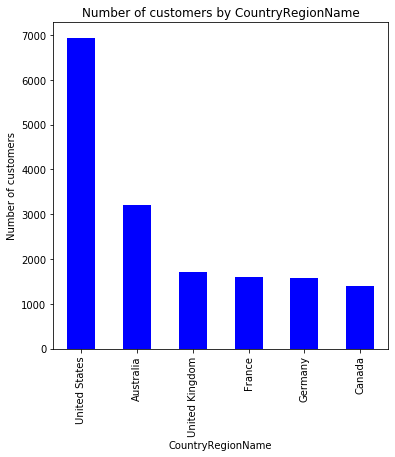

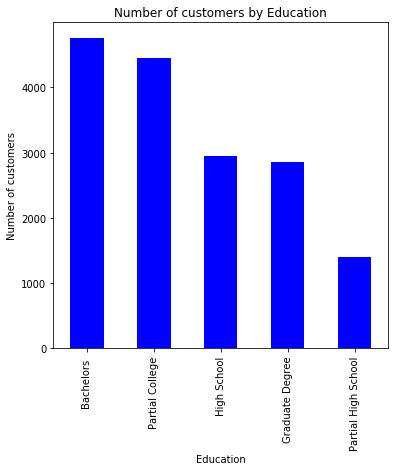

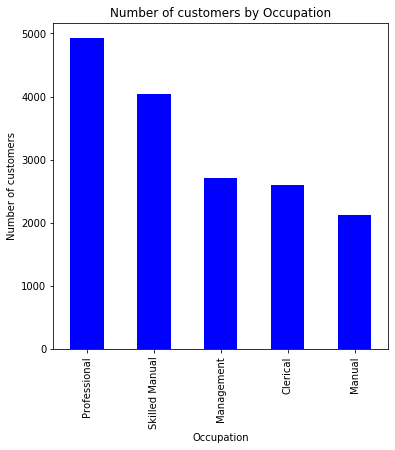

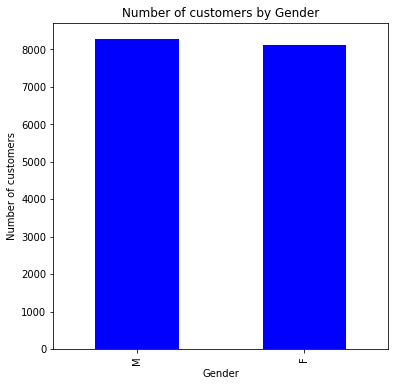

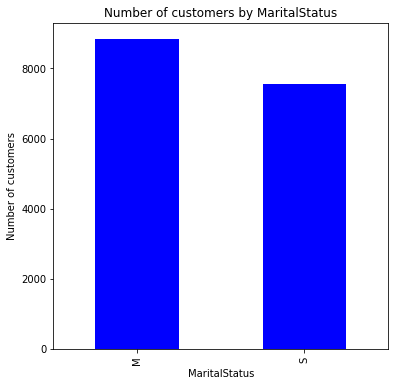

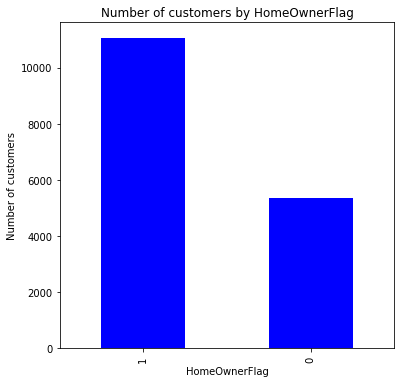

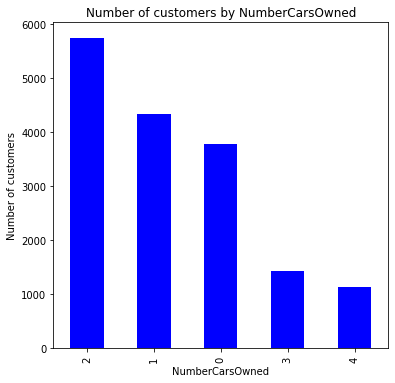

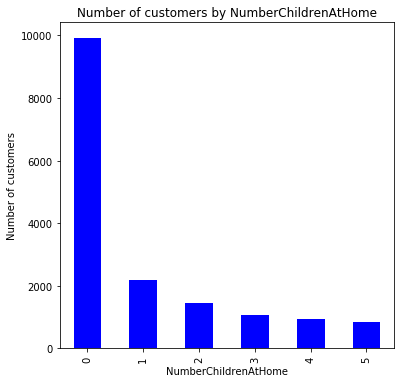

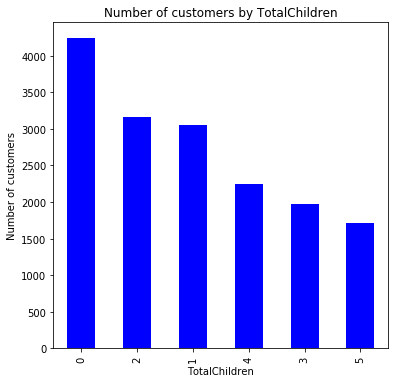

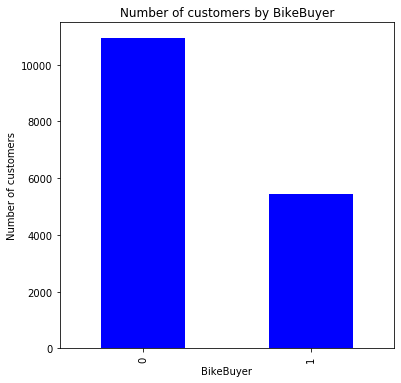

In [24]:
#Bar chart for each cate features
def plot_bars(dt, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = dt[col].value_counts() # find the counts for each unique category
        #print(counts)
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Number of customers by ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of customers')# Set text for y axis
        plt.show()

cat_cols = [#'City','StateProvinceName','PostalCode', 
    'CountryRegionName','Education','Occupation','Gender', 'MaritalStatus', 
    'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren','BikeBuyer']
plot_bars(dt, cat_cols)    

### Explore numerical features

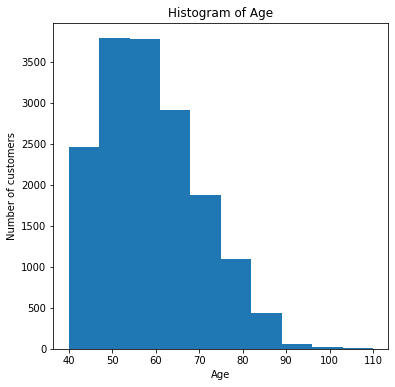

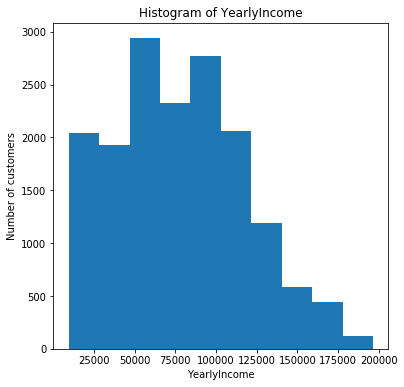

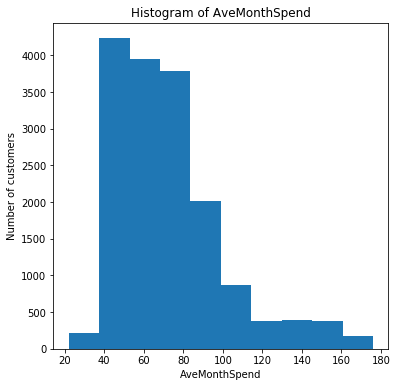

In [25]:
# Histogram for each num features
def plot_histogram(dt, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        dt[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of customers')# Set text for y axis
        plt.show()
        
num_cols = ['Age', 'YearlyIncome', 'AveMonthSpend']    
plot_histogram(dt, num_cols)


#Age, Yearlyincome, and AveSpend are right skewed

In [26]:
# Try seaborn and kde plot
# def plot_density_hist(dt, cols, bins = 10, hist = False):
#     for col in cols:
#         sns.set_style("whitegrid")
#         sns.distplot(dt[col], bins = bins, rug=True, hist = hist)
#         plt.title('Histogram of ' + col) # Give the plot a main title
#         plt.xlabel(col) # Set text for the x axis
#         plt.ylabel('Number of customers')# Set text for y axis
#         plt.show()
        
# plot_density_hist(dt, num_cols)     

### Viz for classification problem: 

In [27]:
buy_counts = dt['BikeBuyer'].value_counts()
print(buy_counts)

#NOTE: Imbalance data

0    10949
1     5455
Name: BikeBuyer, dtype: int64


In [28]:
#Visualize class & numeric features
#to understand which features are useful for class separation


#### Box plot/Violin plot: Relationship between num_var and BikeBuyer

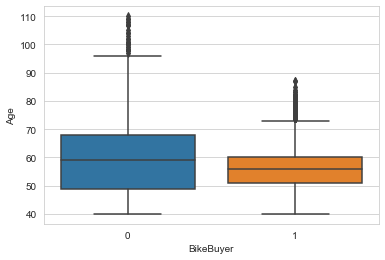

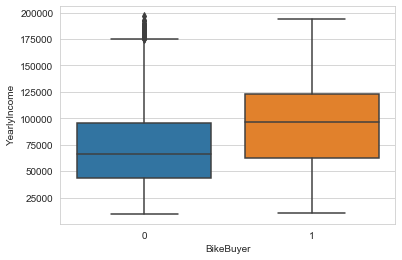

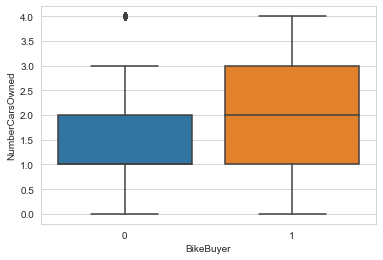

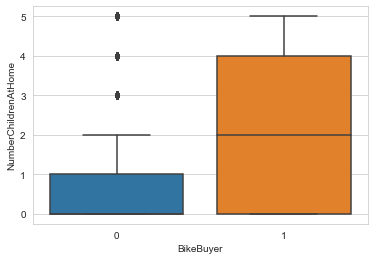

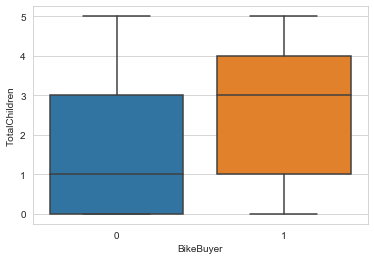

In [29]:
def plot_box(data, cols, col_x = 'BikeBuyer'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=dt)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

nume_cols = ['Age', 'YearlyIncome','NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren']
plot_box(data, nume_cols)
#Count number of cars and number of kids as categorical var
#But violin plot is naive for these vars. Box plot is more meaningful

In [30]:
'''COMMENTS: Age and yearly income is a useful feature to predict the chance that
customers will purchase the bike.
- Age: Purchased 25-75% quantiles in the range of 52-60, with no outliers beyond 90yo
- Yearly Income: Customers with higher yearly income tends to purchase more, 
            25-75%quantiles in range 67k- 125k
#Consider number of car owned and number of kids as num_var:
- Num of car owed: 25-75 is 1-3 cars
- More kids = more chance to buy bike. 

??? Should I consider drop 1 number of kids var???
            
Customers who made purchase tends to be younger and having higher income
'''

'COMMENTS: Age and yearly income is a useful feature to predict the chance that\ncustomers will purchase the bike.\n- Age: Purchased 25-75% quantiles in the range of 52-60, with no outliers beyond 90yo\n- Yearly Income: Customers with higher yearly income tends to purchase more, \n            25-75%quantiles in range 67k- 125k\n#Consider number of car owned and number of kids as num_var:\n- Num of car owed: 25-75 is 1-3 cars\n- More kids = more chance to buy bike. \n\n??? Should I consider drop 1 number of kids var???\n            \nCustomers who made purchase tends to be younger and having higher income\n'

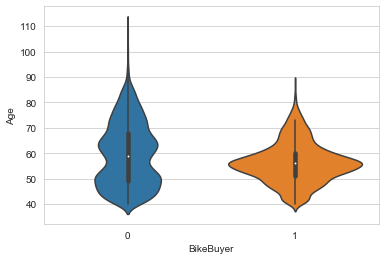

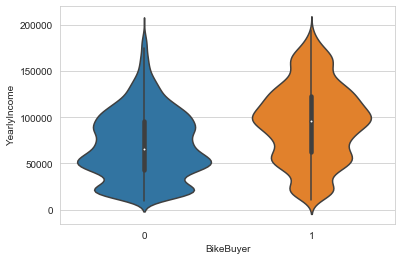

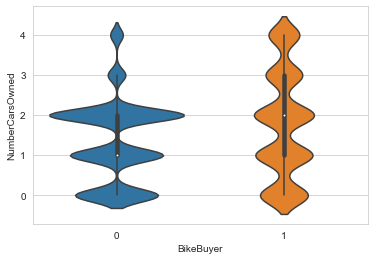

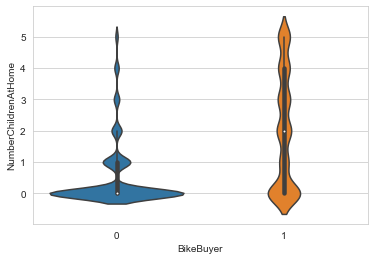

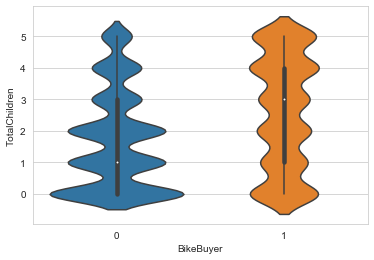

In [31]:
# Try violin plot
def plot_violin(data, cols, col_x = 'BikeBuyer'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, data=dt)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

plot_violin(dt, nume_cols)

In [32]:
'''Additional observation:
- Age and Yearly income of the purchased group tends to have normal distribution
'''

'Additional observation:\n- Age and Yearly income of the purchased group tends to have normal distribution\n'

In [33]:
#Visualize class & categorical features


In [34]:
#### Bar plot: Relationship between cate_var and BikeBuyer

CountryRegionName


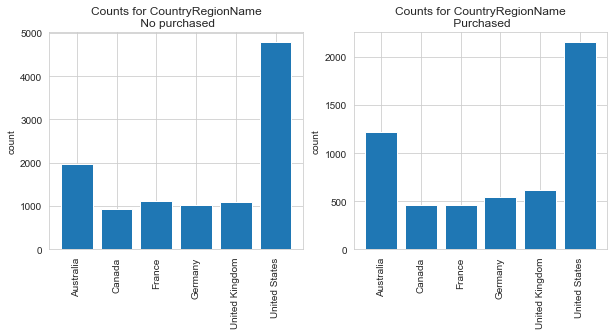

Education


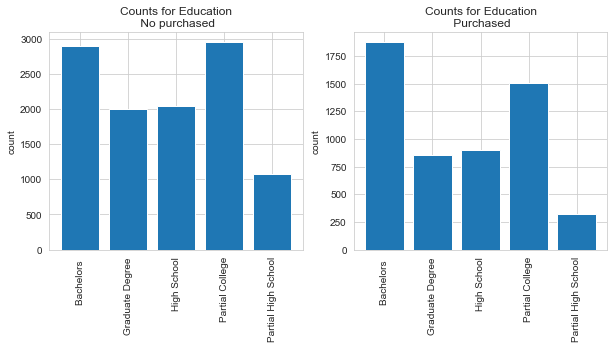

Occupation


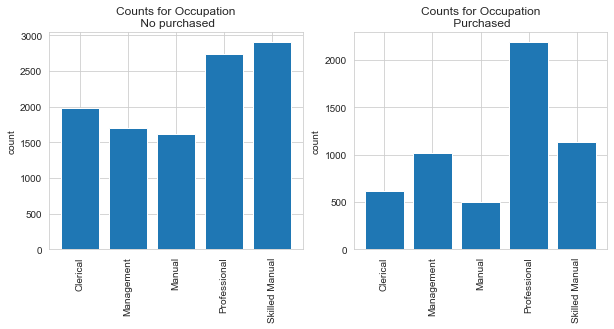

Gender


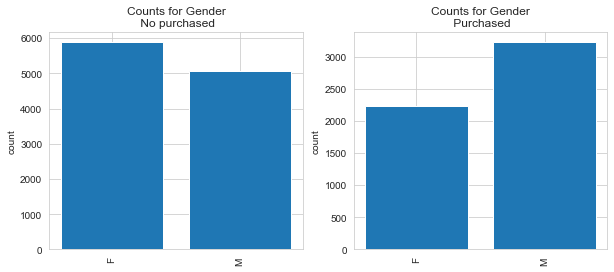

MaritalStatus


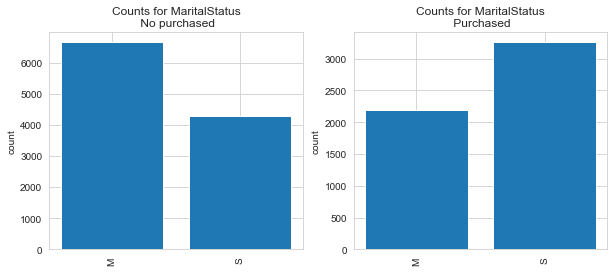

HomeOwnerFlag


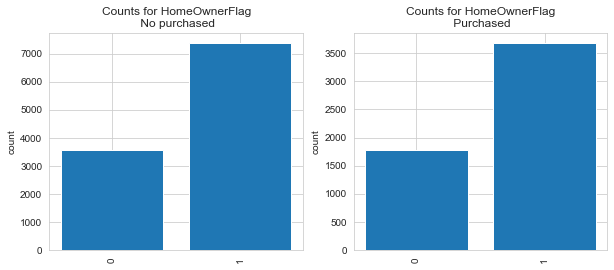

NumberCarsOwned


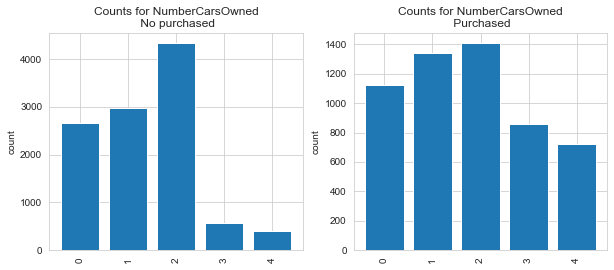

NumberChildrenAtHome


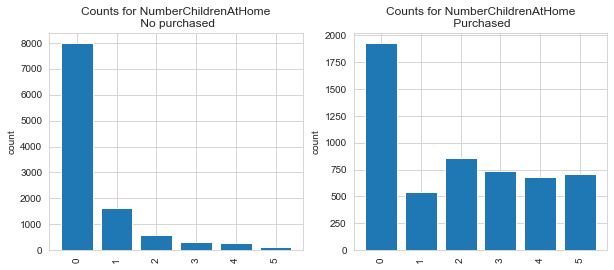

TotalChildren


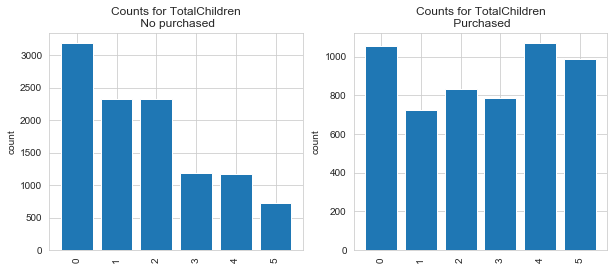

In [35]:
import numpy as np
cate_cols = [ 'CountryRegionName','Education','Occupation','Gender', 'MaritalStatus', 
    'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren']

dt['dummy'] = np.ones(shape = dt.shape[0])
for col in cate_cols:
    print(col)
    counts = dt[['dummy', 'BikeBuyer', col]].groupby(['BikeBuyer', col], as_index = False).count()
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n No purchased')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['BikeBuyer'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Purchased')
    plt.ylabel('count')
    plt.show()

In [36]:
'''OBSERVATION:
- Not much difference in Country purchased
- Education: in proportionate, Partial High School tends to purchase more 
            Grad/High school/Partial high school less
- Occupations: Professional tend to purchase more, 
            Skilled Manual, Clerical, Management, Manual less
- Gender: Male do more purchase
- Marital status: Single buy more
- Home owner: Not much difference
- Number of cars owned: strange- ppl have many cars still buy bike-even 3 and 4 cars
- Number of children at home and total children: More child = more bike

'''

'OBSERVATION:\n- Not much difference in Country purchased\n- Education: in proportionate, Partial High School tends to purchase more \n            Grad/High school/Partial high school less\n- Occupations: Professional tend to purchase more, \n            Skilled Manual, Clerical, Management, Manual less\n- Gender: Male do more purchase\n- Marital status: Single buy more\n- Home owner: Not much difference\n- Number of cars owned: strange- ppl have many cars still buy bike-even 3 and 4 cars\n- Number of children at home and total children: More child = more bike\n\n'

## Viz for regression problem

In [37]:
# Transform features into log:
dt[['log_Age', 'log_YearlyIncome', 'log_AveMonthSpend']]= dt[['Age', 'YearlyIncome', 'AveMonthSpend']].applymap(math.log)

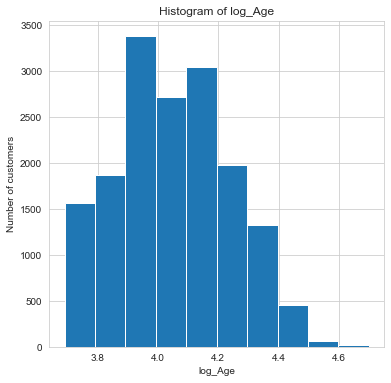

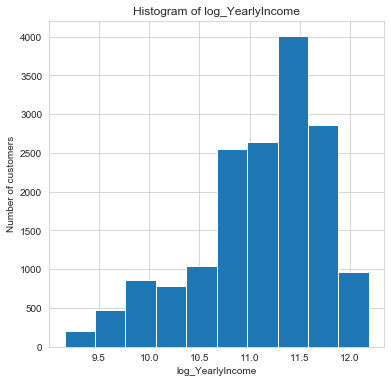

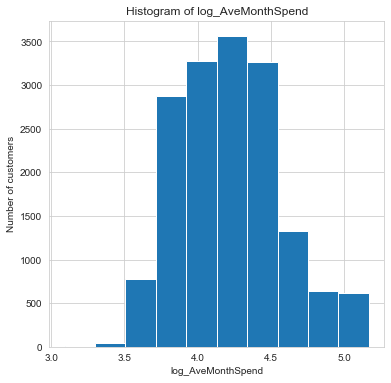

In [38]:
#Replot to check distribution
plot_histogram(dt,['log_Age', 'log_YearlyIncome', 'log_AveMonthSpend'])

In [39]:
# --> use log age, log month and normal yearly income

#### Scatter plot: Relationship between num_var and AveMonthSpend

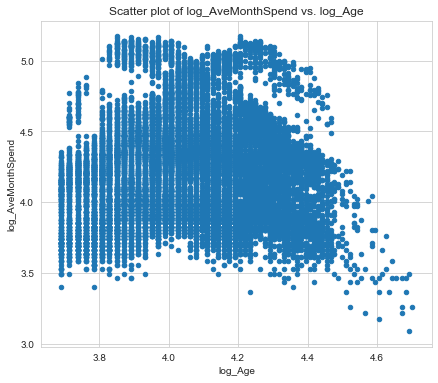

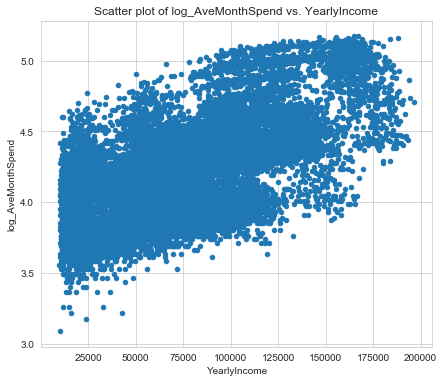

In [40]:
def plot_scatter(dt, cols, col_y = 'log_AveMonthSpend'):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        dt.plot.scatter(x = col, y = col_y, ax = ax)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y
                     )# Set text for y axis
        plt.show()

nume = ['log_Age', 'YearlyIncome']
plot_scatter(dt, nume)      

#Scatter plot doesn't work well
#Can't use number of cars and number of kids as numerical features

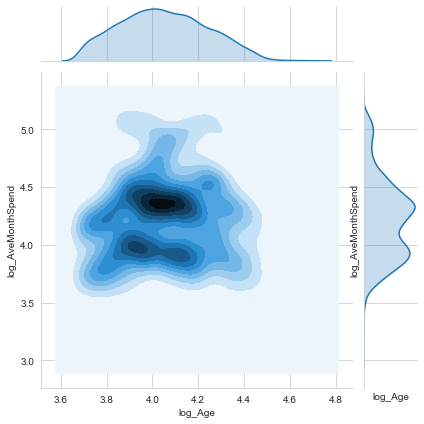

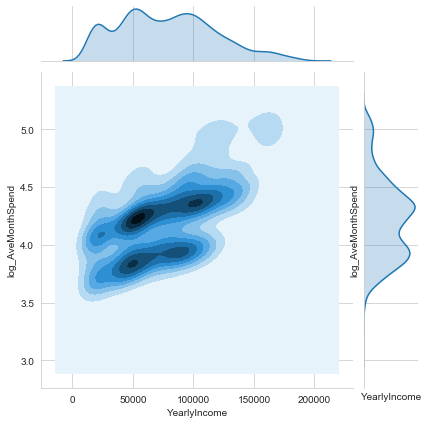

In [41]:
#Try plot density
def plot_desity_2d(data, cols, col_y = 'log_AveMonthSpend', kind ='kde'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.jointplot(col, col_y, data=dt, kind=kind)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()

plot_desity_2d(dt,nume)      

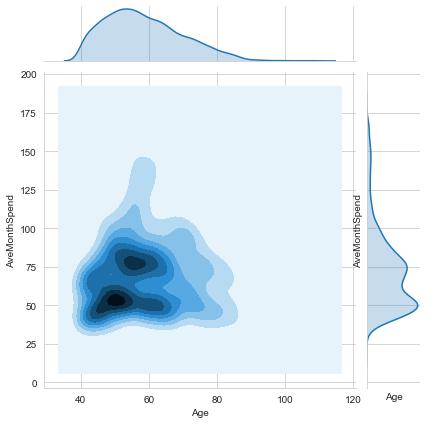

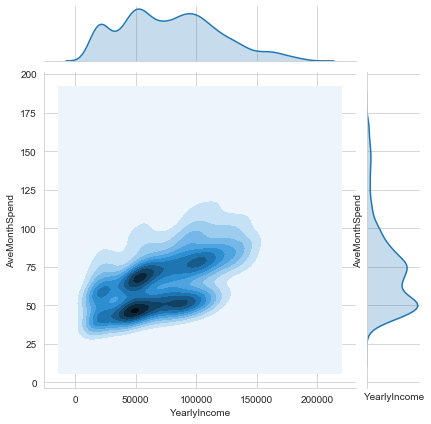

In [42]:
def plot_desity_2d(data, cols, col_y = 'AveMonthSpend', kind ='kde'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.jointplot(col, col_y, data=dt, kind=kind)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()

plot_desity_2d(dt,['Age','YearlyIncome'])    

In [43]:
#Higher income leads to higher AvgMonthSpend. 
#Trends in Age is not clear

#### Box plot: Relationship between cate_var and AveMonthSpend

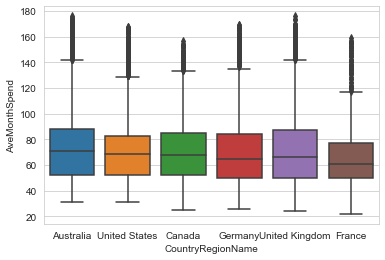

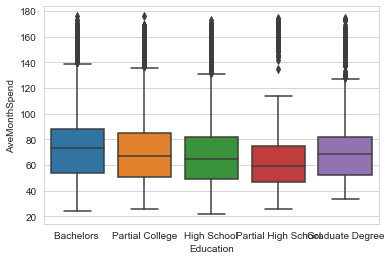

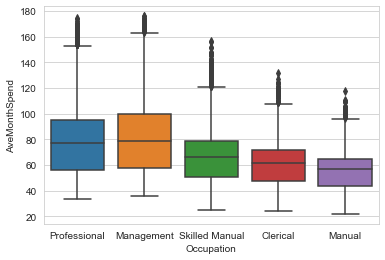

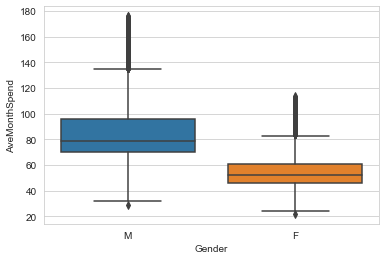

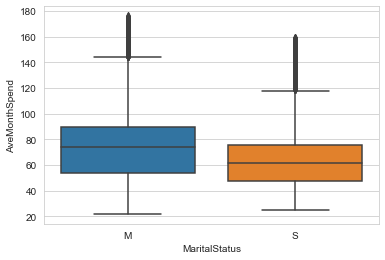

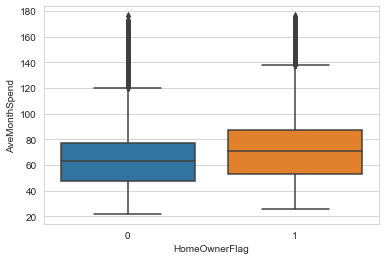

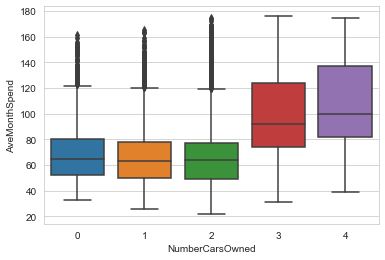

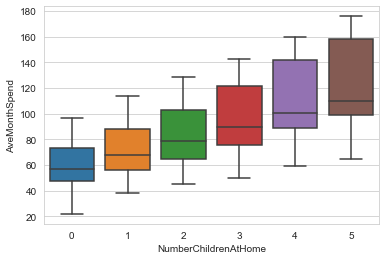

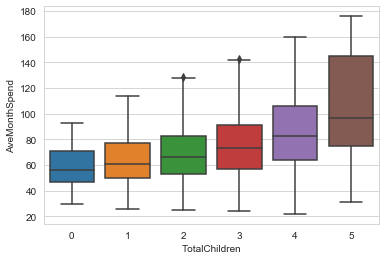

In [44]:
def plot_box(data, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=dt)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
cate = [ 'CountryRegionName','Education','Occupation','Gender', 'MaritalStatus', 
    'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren']
plot_box(dt, cate)    

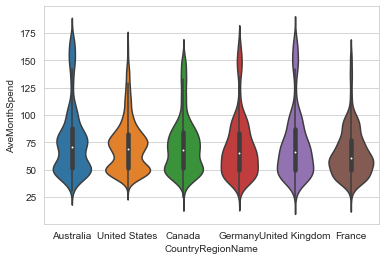

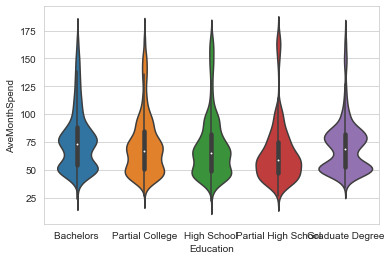

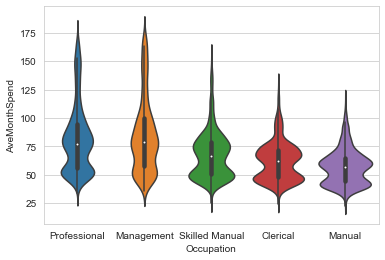

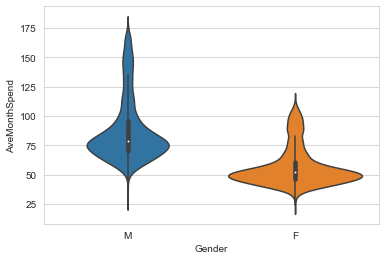

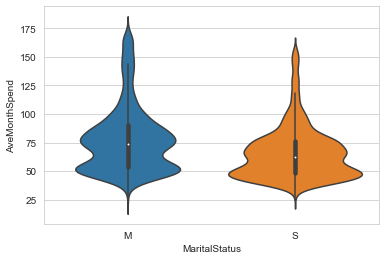

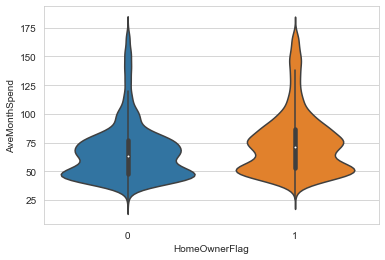

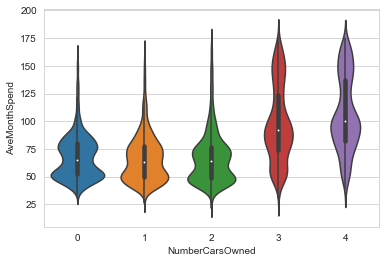

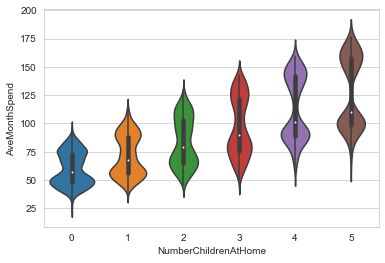

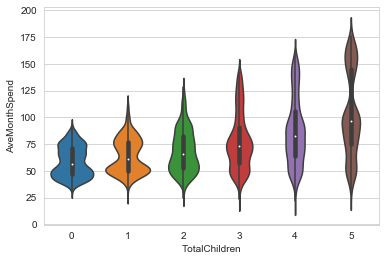

In [45]:
def plot_violin(data, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col, col_y, data=dt)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
plot_violin(dt, cate)   

In [46]:
'''OBSERVATION:
- No difference betweeen countries
- Slightly less spend customer is a Partial high school
- Pofessional and Management spend more, similar distribution, others spend less, least: Manual
- Male spend more
- Married spend more
- Home owner slightly more
- Own 3 and 4 cars spend more, same dist
- More children, spend more
'''

'OBSERVATION:\n- No difference betweeen countries\n- Slightly less spend customer is a Partial high school\n- Pofessional and Management spend more, similar distribution, others spend less, least: Manual\n- Male spend more\n- Married spend more\n- Home owner slightly more\n- Own 3 and 4 cars spend more, same dist\n- More children, spend more\n'

In [48]:
#dt.to_csv('Cleaned.csv')